# Cart endgame

## Import and load the original data

In [2]:
import sys
sys.path.insert(1, '../') 
from utils.loader import Loader

import pandas as pd
from sklearn import tree
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import prince
import numpy as np

In [3]:
data = Loader.load_all()['original']
label_encoder = LabelEncoder()
data["price_categ"].value_counts()

/home/lingfeng/Desktop/repos/Cars_Price_Prediction/CART/../utils/loader.py:133: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,
/home/lingfeng/Desktop/repos/Cars_Price_Prediction/CART/../utils/loader.py:133: DtypeWarning: Columns (120) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,
/home/lingfeng/Desktop/repos/Cars_Price_Prediction/CART/../utils/loader.py:145: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the ori

price_categ
Middle low range     56956
Budget               29243
Low end              19814
Middle range         17022
Middle high range    10216
Luxury                9856
Premiun               8662
High end              7743
Very low end          5627
Name: count, dtype: int64

### Describe some columns
A more detailed version of the dataset can be found in the DataDescription.ipynb

In [4]:
data.select_dtypes(include=['category'])

,color,brand,model,version,fuelType,bodyTypeId,transmissionTypeId,province,environmentalLabel,jato_classification,...,Acabado Exterior_Pintura,Acabado Exterior_Rueda,AC_Zones,AC_Type,Metodo_Apertura,Tipo_Faro,interior_clock,arm_suppport_front,arm_suppport_back,price_categ
idx,,,,,,,,,,,,,,,,,,,,,
47257,Gris / Plata,NISSAN,QASHQAI+2,1.5 dCi ACENTA 4x2,Diésel,Monovolumen,Manual,Madrid,B,M2,...,pintura solida,rueda repuesto llanta acero menor tamaño resto,BIZONA,AUTO,Mando a distancia,Halógeno,regular,Tiene,Tiene,Low end
47258,Verde (VERDE OLIVO MATE),MERCEDES-BENZ,Clase GLC,GLC 300 d 4MATIC,Diésel,SUV,Automatico,Zamora,NaN,B1,...,pintura solida,no tiene,BIZONA,AUTO,Teléfono móvil,LED,no tiene,Tiene,Tiene,Luxury
47259,Gris / Plata,LAND-ROVER,Discovery,2.7 TDV6 HSE CommandShift,Diésel,SUV,Automatico,Málaga,NaN,L1,...,pintura solida,rueda repuesto llanta aleación ligera tamaño n...,BIZONA,AUTO,Mando a distancia,Xenón,regular,Tiene,no tiene,Budget
47260,Gris / Plata,JAGUAR,EPace,2.0D 110kW,Diésel,SUV,Manual,Murcia,C,B1,...,pintura solida,no tiene,BIZONA,AUTO,Mando a distancia,LED,no tiene,Tiene,Tiene,Middle low range
47261,Negro,SKODA,Octavia,Combi 2.0 TSI 162KW 220cv DSG RS,Gasolina,Familiar,Automatico,Sevilla,C,S1,...,pintura solida,rueda repuesto llanta acero tamaño normal,BIZONA,AUTO,Mando a distancia,Xenón,no tiene,Tiene,Tiene,Middle low range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94566,Azul (Azul Grafito efecto perla),VOLKSWAGEN,Golf Plus,CrossGolf 1.4 TSI 140cv,Gasolina,Monovolumen,Manual,Barcelona,C,S2,...,pintura solida,rueda repuesto llanta acero menor tamaño resto...,BIZONA,AUTO,Mando a distancia,Otro,regular,caja integrada,no tiene,Low end
94567,Rojo,RENAULT,Captur,techno TCe 103 kW 140CV GPF,Híbrido,SUV,Automatico,Barcelona,C,M2,...,pintura bicolor solida,no tiene,MONOZONA,AUTO,Tarjeta/llave inteligente,LED,no tiene,Tiene,no tiene,Middle low range
94568,Beige,AUDI,Q3,2.0 TDI 140cv quattro Str S line edition,Diésel,SUV,Manual,Murcia,NaN,L1,...,pintura metalizada,rueda repuesto llanta acero menor tamaño resto,BIZONA,AUTO,Mando a distancia,Xenón,no tiene,Tiene,no tiene,Middle low range


In [5]:
def hist_plot(arr, n_bins, title = "hist_plot", x_label = "price", y_label="frecuency"):
    plt.figure(figsize=(8, 6))
    sns.histplot(arr, kde=True, bins=n_bins)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

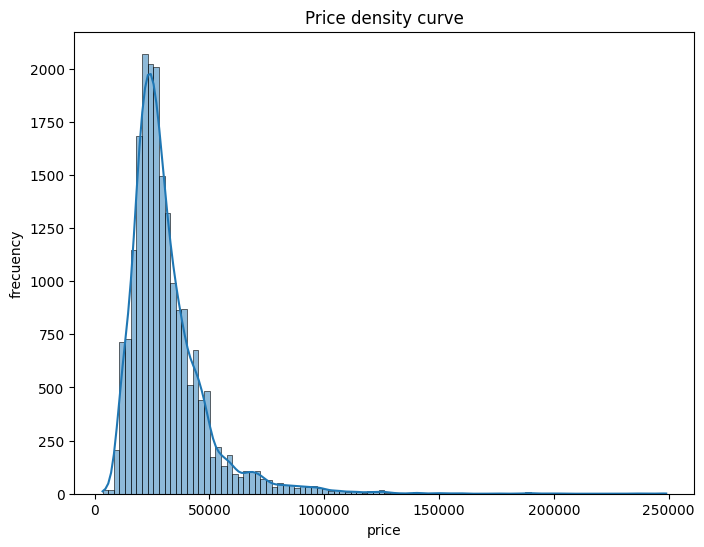

In [6]:
hist_plot(data[data["fuelType"]=="Híbrido"]["price"], n_bins=100, title='Price density curve')

In [7]:
precios_electricos = data[data["fuelType"]=="Eléctrico"]["price"]
print(precios_electricos)

idx
47362    13900
47511    16995
47535     9499
47559    22500
47603    22452
         ...  
94291    11900
94342    16990
94359    59990
94436    34390
94557    25990
Name: price, Length: 6591, dtype: int64


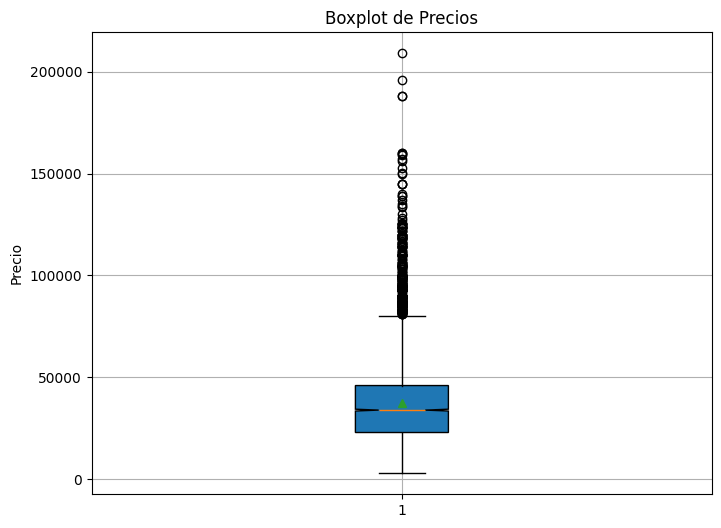

In [8]:
plt.figure(figsize=(8, 6))
plt.boxplot(precios_electricos, notch=True, vert=True, patch_artist=True, showmeans=True)
plt.title('Boxplot de Precios')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

The related outliers were checked manually throught the data source, and we could confirmed that they are not outliers

In [9]:
Q1 = data['price'].quantile(0.25)
Q2 = data['price'].quantile(0.5)  # Esta es la mediana
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

upper_whisker = (Q3 + 1.5 * IQR)
print(upper_whisker)

data[data["fuelType"] == "Eléctrico"][data["price"]>upper_whisker][["price", "brand"]].sort_values(by='price', ascending=False)
#data = data[data["price"]<upper_whisker]

52515.0


/tmp/ipykernel_13007/4040790187.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data["fuelType"] == "Eléctrico"][data["price"]>upper_whisker][["price", "brand"]].sort_values(by='price', ascending=False)


,price,brand
idx,,
28269,209000,MASERATI
85726,196000,MASERATI
144182,188000,MERCEDES-BENZ
134773,188000,MERCEDES-BENZ
21981,159900,PORSCHE
...,...,...
34466,52600,AUDI
34631,52600,BMW
148354,52600,MINI


## Separate the DF in fuelType Categories

We split the dataframe into the categories so in the PCA or CA, we don't discart columns because of the most popular classes

In [10]:
def split_fuel_type(data:pd.DataFrame) -> dict:
    ret={}
    ret["Eléctrico"] = data[data["fuelType"] == "Eléctrico"]
    ret["Combustion"] = data[(data["fuelType"] == "Gasolina") | (data["fuelType"] == "Diésel")]
    ret["Híbrido"] = data[data["fuelType"] == "Híbrido"]
    ret["Híbrido enchufable"] = data[data["fuelType"] == "Híbrido enchufable"]
    ret["Gas"] = data[(data["fuelType"] == "Gas licuado (GLP)") | (data["fuelType"] == "Gas natural (CNG)")]
    return ret

In [11]:
data = split_fuel_type(data)

## Data process functions

In [12]:
def fill_na_with_mode(df, column_name, inplace=False):
    if column_name in df.columns:
        mode_value = df[column_name].mode().iloc[0]
        df[column_name] = df[column_name].fillna(mode_value, inplace=inplace)
    else:
        print(f"La columna '{column_name}' no existe en el DataFrame.")
    return df

def impute_with_linear_regression(data, x_columns, y_column):
    df_with_target = data.dropna(subset=[y_column])
    df_without_target = data[data[y_column].isna()]
    
    X_train = df_with_target[x_columns]
    y_train = df_with_target[y_column]
    X_test = df_without_target[x_columns]
    
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_train)
    epsilon = np.finfo(np.float64).eps
    mape = np.mean(np.abs((y_train - y_pred) / (y_train + epsilon))) * 100
    print(f"Regression mape {x_columns} -> {y_column}: {mape}%")
    if not X_test.empty:
        predicted_values = model.predict(X_test)
        data.loc[data[y_column].isna(), y_column] = predicted_values
    return data

def remove_redundand_columns(df:pd.DataFrame )->pd.DataFrame:
    for column in df.columns: #Remove redundant columns
        unique_values = df[column].dropna().unique() 
        if len(unique_values) == 1:
            df = df.drop(column, axis=1)
    return df

def __impute_categorical_mode(df, X, Y):
    # Agrupar por las columnas X y calcular el valor más común (moda) en la columna Y para cada grupo
    modes = df.groupby(X,observed=False)[Y].agg(lambda x: x.dropna().mode()[0] if not x.dropna().empty else None, ).reset_index()
    modes.rename(columns={Y: 'Mode'}, inplace=True)
    
    # Unir el DataFrame original con los modos encontrados para facilitar la imputación
    df = df.merge(modes, on=X, how='left')
    
    # Imputar los valores NaN en Y usando el valor más común de su grupo
    df[Y] = df.apply(lambda row: row['Mode'] if pd.isna(row[Y]) else row[Y], axis=1)

    # Eliminar la columna auxiliar 'Mode' añadida para la imputación
    df.drop('Mode', axis=1, inplace=True)
    
    return df

def impute_categorical_mode(df, X, Y):
    for i in range(len(X)):
        df = __impute_categorical_mode(df, X, Y)
        X.pop(len(X)-1)
    df[Y] = df[Y].fillna("unkown") #If is a unique car
    return df

## Feature selection functions

In [13]:
def CA (categorical_columns, col_x, col_y):
    contingency_table = pd.crosstab(categorical_columns[col_x], categorical_columns[col_y])

    P = contingency_table / contingency_table.values.sum()

    # Calcular los perfiles de fila y columna (matrices D_r y D_c)
    D_r = np.diag(1 / P.sum(axis=1))
    D_c = np.diag(1 / P.sum(axis=0))

    # Calcular la matriz S (correspondencia ajustada)
    S = np.sqrt(D_r).dot(P).dot(np.sqrt(D_c))

    # Aplicar SVD
    svd = TruncatedSVD(n_components=2)
    svd.fit(S)
    row_coordinates = svd.transform(S)  # Coordenadas de las filas
    col_coordinates = svd.components_.T  # Coordenadas de las columnas

    # Visualización
    plt.figure(figsize=(8, 8))
    for i, label in enumerate(contingency_table.index):
        plt.scatter(row_coordinates[i, 0], row_coordinates[i, 1], color='blue')
        plt.text(row_coordinates[i, 0], row_coordinates[i, 1], f'{label}', color='blue', ha='right', va='bottom')
    for i, label in enumerate(contingency_table.columns):
        plt.scatter(col_coordinates[i, 0], col_coordinates[i, 1], color='red', marker='^')
        plt.text(col_coordinates[i, 0], col_coordinates[i, 1], f'{label}', color='red', ha='left', va='top')

    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.title('Gráfico de Análisis de Correspondencias')
    plt.grid(True)
    plt.show()

In [14]:
def chi_square_test(categorical_columns: pd.DataFrame, column_y: str):
    encoded_df = categorical_columns.copy()
    for col in categorical_columns.columns:
        encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

    X = encoded_df.drop(columns=[column_y])
    y = encoded_df[column_y]

    # Realizar la prueba de chi-cuadrado
    chi2_stat, p_values = chi2(X, y)

    # Crear un DataFrame para mostrar los resultados
    results = pd.DataFrame({
        'Feature': X.columns,
        'Chi2 Stat': chi2_stat,
        'p-value': p_values
    })

    # Ordenar los resultados por el valor p
    results.sort_values('p-value', inplace=True)

    plt.figure(figsize=(10, 6))
    plt.barh(results['Feature'], results['p-value'], color='skyblue')
    plt.xlabel('p-value')
    plt.ylabel('Features')
    plt.title('Chi-Square Test Results')
    plt.gca().invert_yaxis()  # Invertir el eje y para que la característica con menor p-value esté arriba
    plt.show()

    # Mostrar el DataFrame de resultados
    return results

In [15]:
def chi_square_filter(categorical_columns: pd.DataFrame, column_y: str, p_value_filter: float) -> pd.DataFrame:
    result = chi_square_test(categorical_columns=categorical_columns, column_y=column_y)
    columns = list(result[ result["p-value"] <= p_value_filter ]["Feature"])
    columns.append("price_categ")
    return categorical_columns[ columns ]

# Electric cars

## Numerical variables selection Eléctrico
Here we will perform PCA and use correlation matrix to select the most correlated numerical variables

In [16]:
def fill_electric_numerical_columns(numerical_columns: pd.DataFrame) -> pd.DataFrame:
    #fill the elemental columns that has a minor amount of missing data with the mode
    numerical_columns = fill_na_with_mode(numerical_columns, "dimensions.length")
    numerical_columns = fill_na_with_mode(numerical_columns, "dimensions.height")
    numerical_columns = fill_na_with_mode(numerical_columns, "electricFeatures.maximumBatteryKWH_kWh")
    numerical_columns = fill_na_with_mode(numerical_columns, "electricFeatures.onboardCharger_kW")
    numerical_columns = fill_na_with_mode(numerical_columns, "electricFeatures.range_KM")

    #fill the missing data witch regression, the parameters were based on the relation matrix 
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["dimensions.length", "dimensions.height"], y_column="dimensions.width")
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["dimensions.length", "dimensions.height", "dimensions.width"], y_column="trunkCapacityInLiters")
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["power_cv", "power_kw"], y_column="maxSpeed")
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["power_cv", "power_kw", "maxSpeed"], y_column="acceleration")
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["power_cv", "power_kw", "maxSpeed"], y_column="acceleration")
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["Llantas_Diametro_cm", "power_kw"], y_column="max_torque_nm")
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["electricFeatures.maximumBatteryKWH_kWh", "power_kw", "dimensions.length", "dimensions.height", "dimensions.width"], y_column="electricFeatures.combinedConsumption_kWh/")
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["electricFeatures.maximumBatteryKWH_kWh", "electricFeatures.combinedConsumption_kWh/", "power_kw"], y_column="electricFeatures.range_KM")
    numerical_columns.dropna(axis=1, inplace=True)
    return numerical_columns

def get_electric_numerical_columns (data: pd.DataFrame) -> pd.DataFrame:
    numerical_columns = data.select_dtypes(include=['number'])
    numerical_columns.drop(columns=[ "car_id", "electricFeatures.maxPower_CV"], inplace=True) # electricFeatures.maxPower_CV is = power_cv (Duplicated colums)

    #if all the values of the numerical columns is 0, we remove the column
    cols_to_drop = numerical_columns.columns[(numerical_columns == 0).all()]
    numerical_columns = numerical_columns.drop(cols_to_drop, axis=1)

    #Remove the column with all NAs
    max_nans = 6586
    thresh = numerical_columns.shape[0] - max_nans

    numerical_columns.dropna(axis=1, thresh=thresh+1, inplace=True)
    return fill_electric_numerical_columns(numerical_columns)

In [17]:
numerical_columns = get_electric_numerical_columns(data["Eléctrico"])

Regression mape ['dimensions.length', 'dimensions.height'] -> dimensions.width: 1.6468475373043987%
Regression mape ['dimensions.length', 'dimensions.height', 'dimensions.width'] -> trunkCapacityInLiters: 16.915082042969473%
Regression mape ['power_cv', 'power_kw'] -> maxSpeed: 5.689473571028928%
Regression mape ['power_cv', 'power_kw', 'maxSpeed'] -> acceleration: 13.035625391285736%
Regression mape ['power_cv', 'power_kw', 'maxSpeed'] -> acceleration: 11.854883719521563%
Regression mape ['Llantas_Diametro_cm', 'power_kw'] -> max_torque_nm: 17.854083487783615%
Regression mape ['electricFeatures.maximumBatteryKWH_kWh', 'power_kw', 'dimensions.length', 'dimensions.height', 'dimensions.width'] -> electricFeatures.combinedConsumption_kWh/: 17.204755109687113%
Regression mape ['electricFeatures.maximumBatteryKWH_kWh', 'electricFeatures.combinedConsumption_kWh/', 'power_kw'] -> electricFeatures.range_KM: 16.16138222681963%


In [18]:
correlation_matrix = numerical_columns.corr()["price"]
print(correlation_matrix)

price                                        1.000000
km                                          -0.343331
year                                         0.459700
doors                                        0.092279
seatingCapacity                              0.257532
trunkCapacityInLiters                        0.301739
maxSpeed                                     0.655830
acceleration                                -0.582307
power_cv                                     0.709338
power_kw                                     0.712126
max_torque_nm                                0.677488
speakers                                     0.294090
dimensions.width                             0.689372
dimensions.height                            0.055209
dimensions.length                            0.613427
Numero_Testigos                              0.183137
Llantas_Diametro_cm                          0.633856
electricFeatures.range_KM                    0.600411
electricFeatures.maximumBatt

In [19]:
scaler = StandardScaler()
df_scaled  = scaler.fit_transform(numerical_columns)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

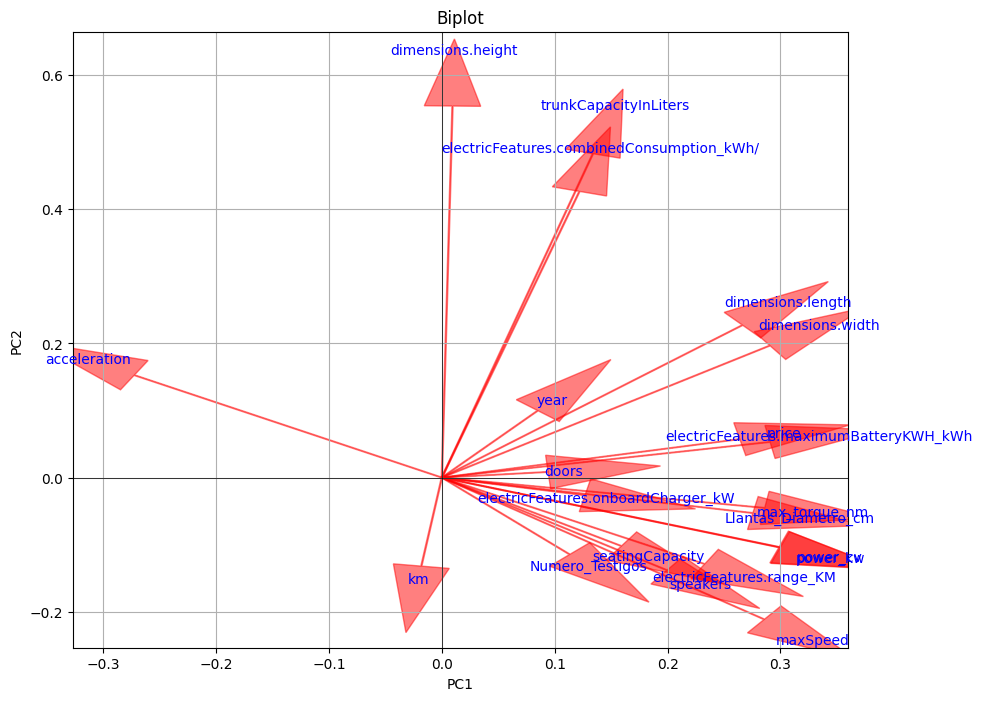

In [20]:
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 8))
    origin = [0, 0]  # Origen de las flechas

    # Dibujar las flechas
    for i in range(len(coeff)):
        plt.arrow(origin[0], origin[1], coeff[i,0], coeff[i,1], color='r', alpha=0.5, head_width=0.05, head_length=0.1)
        if labels is not None:
            plt.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='blue', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Biplot")
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.xlim(min(coeff[:,0])*1.2, max(coeff[:,0])*1.2)
    plt.ylim(min(coeff[:,1])*1.2, max(coeff[:,1])*1.2)
    plt.show()

# Llamada a la función biplot
biplot(principal_components, np.transpose(pca.components_[0:2, :]), labels=numerical_columns.columns)

## Test CART regression trees with only numerical variables

In [21]:
X = numerical_columns.drop(columns="price")
y = numerical_columns["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [22]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Realizar predicciones sobre el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Calcular el MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 10.85%


## Electrico categorical variables
Here we will perform CA and Chi2 test to select the best categorical variables

In [23]:
def get_electric_categorical_columns(df: pd.DataFrame) -> pd.DataFrame:
    ret = df.select_dtypes(include=['category'])
    ret = ret.drop(columns=["environmentalLabel"]) #All of the cars of this dataframes are electrical which implies 0 emission
    ret = remove_redundand_columns(ret)
    ret = impute_categorical_mode(df=ret, X=["brand", "model"], Y="version")
    ret = impute_categorical_mode(df=ret, X=["brand", "model"], Y="jato_classification")
    ret = impute_categorical_mode(df=ret, X=["brand", "model", "traction"], Y="brakes")
    ret = impute_categorical_mode(df=ret, X=["brand", "model", "traction","brakes"], Y="front_suspension")
    ret = impute_categorical_mode(df=ret, X=["brand", "model", "traction","brakes"], Y="rear_suspension")
    return ret

In [24]:
categorical_columns = get_electric_categorical_columns(data["Eléctrico"])

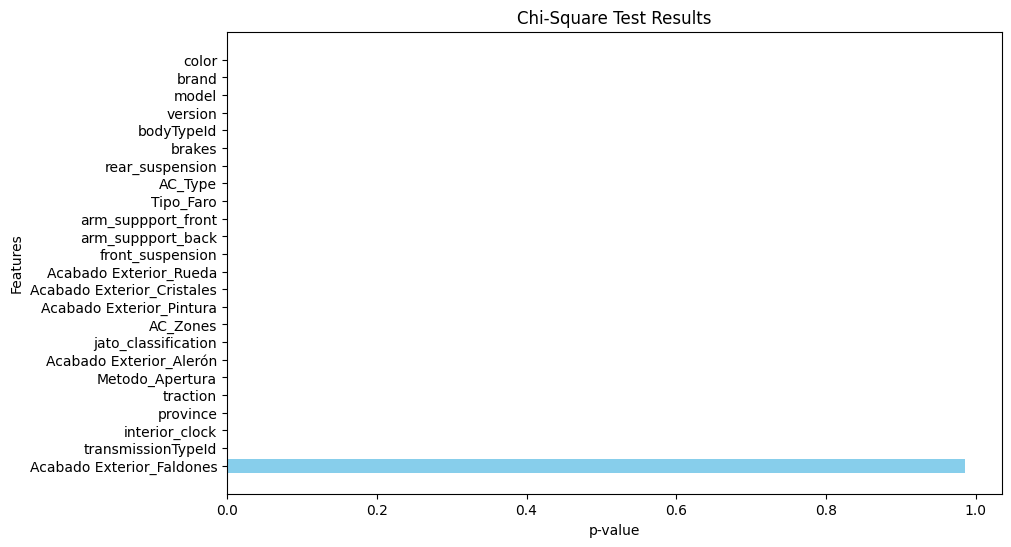

,Feature,Chi2 Stat,p-value
0,color,17355.917738,0.000000e+00
1,brand,1800.198086,0.000000e+00
2,model,15590.848906,0.000000e+00
3,version,19903.204434,0.000000e+00
4,bodyTypeId,6530.816750,0.000000e+00
9,brakes,1581.335781,0.000000e+00
11,rear_suspension,1848.387572,0.000000e+00
18,AC_Type,1486.737498,0.000000e+00
20,Tipo_Faro,1590.069687,0.000000e+00
22,arm_suppport_front,3759.181818,0.000000e+00


In [25]:
chi_square_test(categorical_columns=categorical_columns, column_y="price_categ")

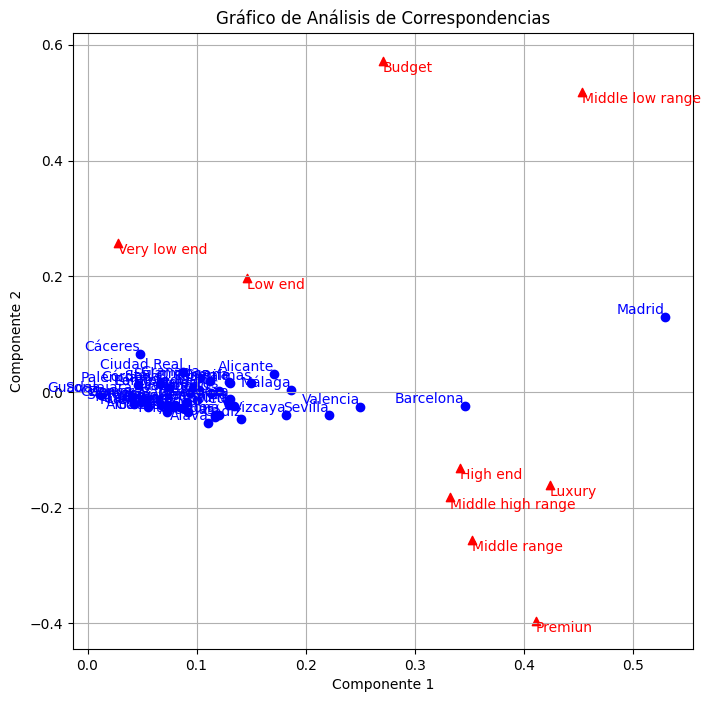

In [26]:
CA(categorical_columns=categorical_columns, col_x="province", col_y="price_categ")

In [27]:
categorical_columns["price_categ"].value_counts()

price_categ
Middle low range     1353
Luxury               1182
Premiun              1113
Middle range          820
High end              767
Middle high range     727
Budget                483
Low end               141
Very low end            5
Name: count, dtype: int64

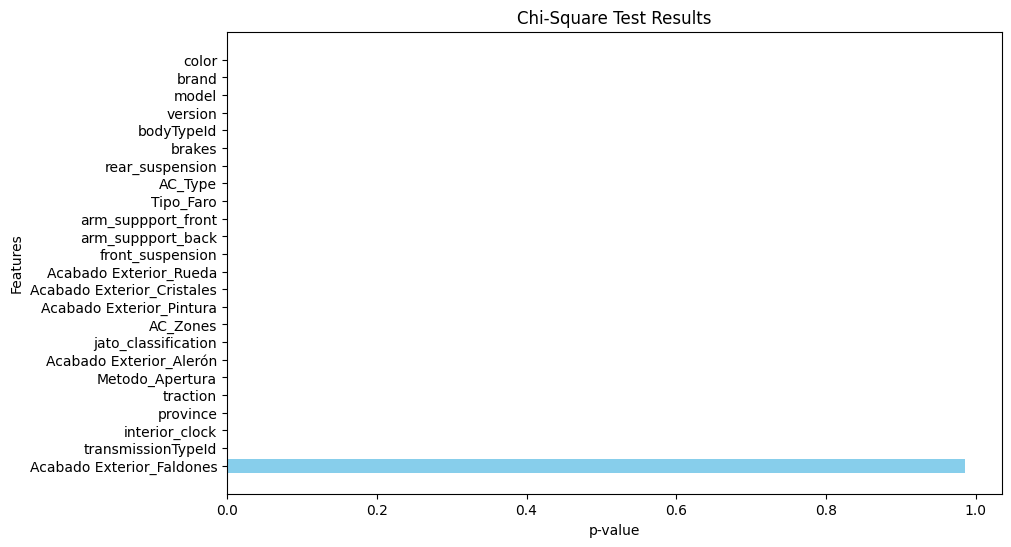

Index(['color', 'brand', 'model', 'version', 'bodyTypeId', 'brakes',
       'rear_suspension', 'AC_Type', 'Tipo_Faro', 'arm_suppport_front',
       'arm_suppport_back', 'price_categ'],
      dtype='object')

In [28]:
categorical_columns = chi_square_filter(categorical_columns, "price_categ", p_value_filter=0)
categorical_columns.columns

## Test CART tree classifier with only categorical values

In [29]:
columns = list(categorical_columns.columns)
columns.remove("price_categ")
for col in columns:
    categorical_columns[col] = label_encoder.fit_transform(categorical_columns[col])

# Preparar los datos
X = categorical_columns.drop(columns=["price_categ"])
print(categorical_columns["price_categ"].value_counts())
Y = categorical_columns["price_categ"].apply(lambda x: Loader.encode_price_categ(x))
print(max(Y))

# Dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# Crear el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42, criterion = "entropy")

# Entrenar el modelo
tree_model.fit(X_train, Y_train)

# Predecir las etiquetas del conjunto de prueba
Y_pred = tree_model.predict(X_test)

# Calcular la precisión
mae = mean_absolute_error(Y_test, Y_pred)
print(f"General MAE: {mae}")

price_categ
Middle low range     1353
Luxury               1182
Premiun              1113
Middle range          820
High end              767
Middle high range     727
Budget                483
Low end               141
Very low end            5
Name: count, dtype: int64
8
General MAE: 0.5131445904954499


In [40]:
result = pd.DataFrame({"Real_Categorie": Y_test, "Prediction": Y_pred})
result["diff"] = np.abs(result["Real_Categorie"].astype(int) - result["Prediction"])

In [44]:
errors = result["diff"][result["diff"] > 0]
errors.value_counts()

diff
1    583
2    151
3     30
4      6
5      2
6      1
Name: count, dtype: int64

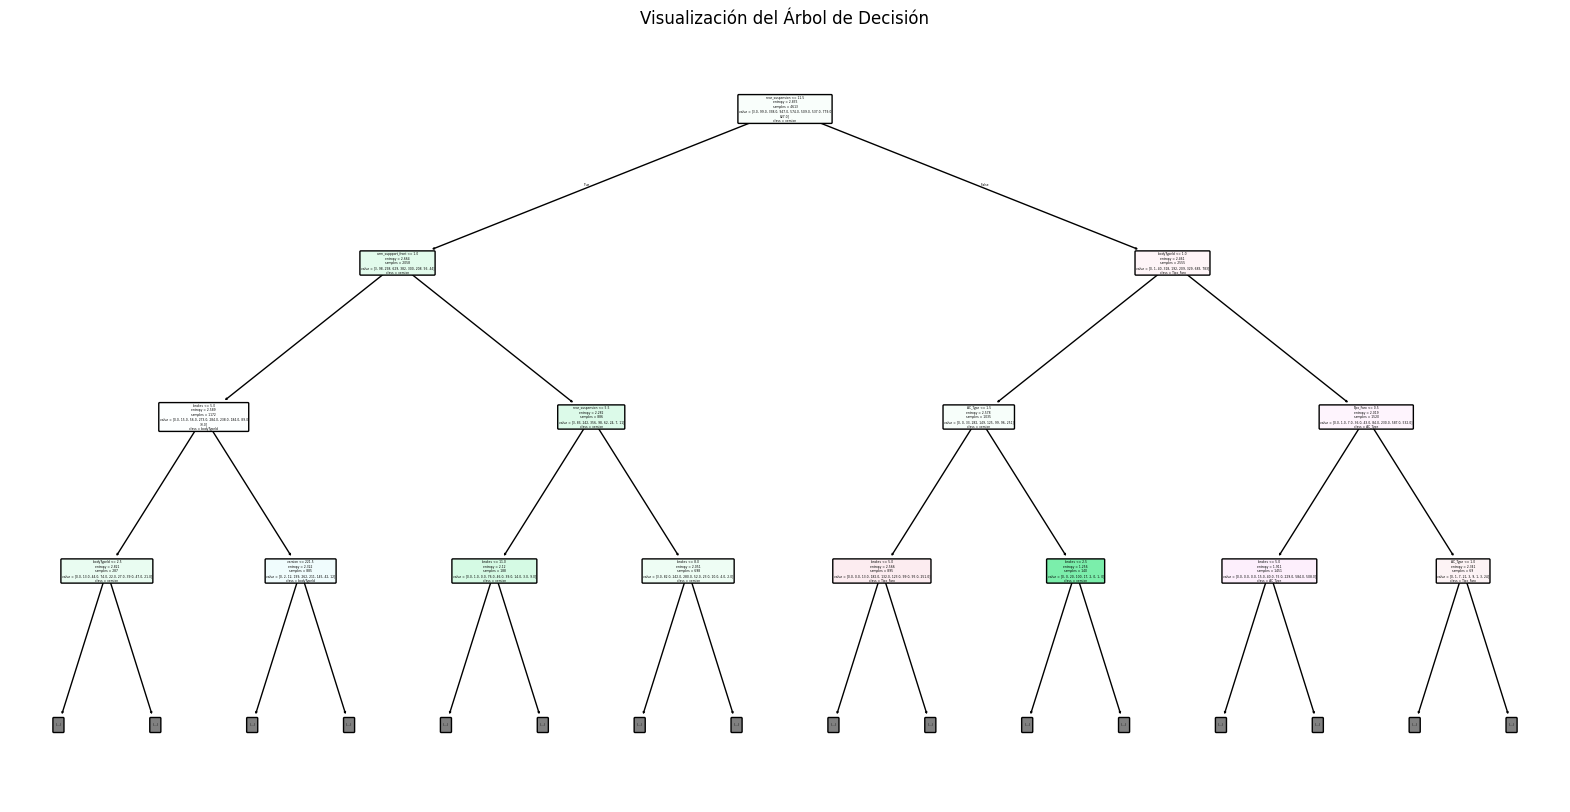

In [30]:
plt.figure(figsize=(20,10))

# Dibujar el árbol de decisión
plot_tree(tree_model, 
          filled=True, 
          rounded=True, 
          class_names=X_train.columns, 
          feature_names=X.columns, 
          max_depth=3)  # Puedes ajustar la profundidad para una mejor visualización o quitar este parámetro para mostrar todo el árbol
plt.title('Visualización del Árbol de Decisión')
plt.show()

## Electric cars price regression with all the columns

# Combustion

In [31]:
def drop_columns_full_nan(data: pd.DataFrame) -> pd.DataFrame:
    #Remove the column that only contain NAs
    cols_to_drop = data.columns[data.isna().all()]
    data = data.drop(cols_to_drop, axis=1)
    return data

def get_combustion_numerical_columns (data: pd.DataFrame) -> pd.DataFrame:
    numerical_columns = data.select_dtypes(include=['number'])

    #if all the values of the numerical columns is 0, we remove the column
    cols_to_drop = numerical_columns.columns[(numerical_columns == 0).all()]
    numerical_columns = numerical_columns.drop(cols_to_drop, axis=1)
    return numerical_columns

def fill_combustion_numerical_columns(numerical_columns: pd.DataFrame) -> pd.DataFrame:
    cols_mode = ['displacement_liters','doors','seatingCapacity','number_of_cylinders','cubicCapacity',"dimensions.length","dimensions.height","Llantas_Diametro_cm","number_of_cylinders","bore_diameter","stroke_length"]
    #fill the elemental columns that has a minor amount of missing data with the mode
    for col in cols_mode:
        numerical_columns = fill_na_with_mode(numerical_columns, col)

    #fill the missing data witch regression, the parameters were based on the relation matrix 
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["dimensions.length", "dimensions.height"], y_column="dimensions.width")
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["dimensions.length", "dimensions.height", "dimensions.width"], y_column="trunkCapacityInLiters")
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["power_cv", "power_kw"], y_column="maxSpeed")
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["power_cv", "power_kw", "maxSpeed"], y_column="acceleration")
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["power_cv", "power_kw", "maxSpeed"], y_column="acceleration")
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["Llantas_Diametro_cm", "power_kw"], y_column="max_torque_nm")
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["Llantas_Diametro_cm", "power_kw"], y_column="rpm_max_torque")
    numerical_columns = impute_with_linear_regression(data=numerical_columns, x_columns=["Llantas_Diametro_cm", "power_kw"], y_column="rpm_max_power")
    numerical_columns.dropna(axis=1, inplace=True)
    return numerical_columns

def get_combustion_categorical_columns(df: pd.DataFrame) -> pd.DataFrame:
    # Select and print only the categorical columns
    ret = df.select_dtypes(include=['category'])
    
    # Temporarily convert the column to strings to perform the replacement
    ret['traction'] = ret['traction'].astype(str).replace({"trasera": "trasero", "delantera": "delantero"})
    # Convert back to a categorical type
    ret['traction'] = ret['traction'].astype('category')

    
    # Remove redundant columns if this function is defined
    ret = remove_redundand_columns(ret)
    return ret


def fill_combustion_categorical_columns(df: pd.DataFrame) -> pd.DataFrame:
    mode_cols = ['brakes','version','jato_classification']
    for col in mode_cols:
        df = fill_na_with_mode(df, col)
    #df = impute_categorical_mode(df=df, X=["brand", "model", "traction","brakes"], Y="front_suspension")
    #df = impute_categorical_mode(df=df, X=["brand", "model", "traction","brakes"], Y="rear_suspension")
    return df

def category_convert(df: pd.DataFrame) -> pd.DataFrame:
    cols_to_convert = df.select_dtypes(include=['object']).columns
    for col in cols_to_convert:
        df[col] = df[col].astype('category')
    return df


In [32]:

# Quit all electric columns from data['Combustion']
for column in data['Combustion'].columns:
    if column.startswith('electric'):
        data['Combustion'] = data['Combustion'].drop(columns=column)
pd.set_option('display.max_rows', None)

In [33]:
# convert object columns to category
data['Combustion'] = category_convert(data['Combustion'])

categorical_columns = get_combustion_categorical_columns(data['Combustion'])

categorical_columns = fill_combustion_categorical_columns(categorical_columns)

data['Combustion'][categorical_columns.columns] = categorical_columns

# Check amount of missing values
missing_values = data['Combustion'].isnull().sum()
missing_values = missing_values[missing_values > 0]

print(missing_values)
categorical_columns.head()
categorical_columns.columns
#categorical_columns['traction']




cubicCapacity                   310
doors                             1
seatingCapacity                  16
warranty_months              129204
environmentalLabel            43228
co2Emissions                  24833
co2EmissionsGramsPerKm        24823
trunkCapacityInLiters         14778
maxSpeed                       5405
acceleration                  17643
front_suspension               8783
rear_suspension                9886
rpm_max_power                 20323
max_torque_nm                   529
rpm_max_torque                15486
cubicCapacity_seat_folded     13380
consumption.urban             30292
consumption.mixed             24493
consumption.extraUrban        30262
dimensions.width               1026
dimensions.height               367
dimensions.length               312
displacement_liters            2160
number_of_cylinders               3
valves_per_cylinder           14746
bore_diameter                  6562
stroke_length                  4961
Llantas_Diametro_cm         

Index(['color', 'brand', 'model', 'version', 'fuelType', 'bodyTypeId',
       'transmissionTypeId', 'province', 'environmentalLabel',
       'jato_classification', 'traction', 'brakes', 'front_suspension',
       'rear_suspension', 'Acabado Exterior_Alerón',
       'Acabado Exterior_Cristales', 'Acabado Exterior_Faldones',
       'Acabado Exterior_Pintura', 'Acabado Exterior_Rueda', 'AC_Zones',
       'AC_Type', 'Metodo_Apertura', 'Tipo_Faro', 'interior_clock',
       'arm_suppport_front', 'arm_suppport_back', 'price_categ'],
      dtype='object')

In [34]:
# Drop all na columns 
data['Combustion'] = drop_columns_full_nan(data['Combustion'])

numerical_columns = get_combustion_numerical_columns(data['Combustion'])


# fill the missing data in numerical columns
numerical_columns = fill_combustion_numerical_columns(numerical_columns)

# Check amount of missing values
missing_values_num = numerical_columns.isnull().sum()
missing_values_num = missing_values_num[missing_values_num > 0]

data['Combustion'][numerical_columns.columns] = numerical_columns

#correlation_matrix = numerical_columns.corr()
#correlation_matrix = correlation_matrix.sort_values(by='price', ascending=False)

correlation_matrix
print(missing_values_num)

Regression mape ['dimensions.length', 'dimensions.height'] -> dimensions.width: 1.615409122198563%
Regression mape ['dimensions.length', 'dimensions.height', 'dimensions.width'] -> trunkCapacityInLiters: 17.709145362721888%
Regression mape ['power_cv', 'power_kw'] -> maxSpeed: 6.410215656255157%
Regression mape ['power_cv', 'power_kw', 'maxSpeed'] -> acceleration: 7.903819131160293%
Regression mape ['power_cv', 'power_kw', 'maxSpeed'] -> acceleration: 6.824540773438703%
Regression mape ['Llantas_Diametro_cm', 'power_kw'] -> max_torque_nm: 2.5518090259601092e+16%
Regression mape ['Llantas_Diametro_cm', 'power_kw'] -> rpm_max_torque: 67.97560330483184%
Regression mape ['Llantas_Diametro_cm', 'power_kw'] -> rpm_max_power: 20.02848016708633%
Series([], dtype: int64)
